In [197]:
import pandas as pd
import praw
from tqdm import tqdm
import requests
import time
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt

In [2]:
reddit = praw.Reddit(
    client_id="a8xe2I2h2OPCimOj9Xd8CQ",
    client_secret="1NZArNea-d6IPw7cZZF_x23Py6m-eQ",
    user_agent="my-app by u/Crafty_Stand3028",
    username="Crafty_Stand3028",
    password="vEt!iZxL4(^Hey7",
)

In [265]:
# Function to retrieve submissions
def getSubmissions(subreddit_name):
    result = []
    submissions = reddit.subreddit(subreddit_name).top(limit=None, params={'show': 'unpinned'})
    for sub in submissions:
        submission_data = {
            "title": sub.title,
            "author": sub.author.name if sub.author else "[deleted]",
            "created_utc": sub.created_utc,
            "score": sub.score,
            "num_comments": sub.num_comments,
            "permalink": sub.permalink,
            "id": sub.id,
            "url": sub.url,
            "is_self": sub.is_self,
            "selftext": sub.selftext,
            "link_flair_text": sub.link_flair_text,
            "link_flair_css_class": sub.link_flair_css_class,
            "is_video": sub.is_video,
            "media": sub.media,
            "thumbnail": sub.thumbnail
        }
        if submission_data['num_comments'] >= 20:
            result.append(submission_data)
    return result

In [6]:
posts = getSubmissions('UkrainianConflict')
posts = pd.DataFrame(posts)
posts.to_csv('UkrainianConflict_posts.csv', index=False)

In [2]:
posts = pd.read_csv('UkrainianConflict_posts.csv')
posts.head(2)

,title,author,created_utc,score,num_comments,permalink,id,url,is_self,selftext,link_flair_text,link_flair_css_class,is_video,media,thumbnail
0,Ukrainians have decided to flood parts around ...,OrcWithFork,1.646543e+09,51273,1400,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,t7rf3v,https://www.reddit.com/gallery/t7rf3v,False,NaN,NaN,NaN,False,NaN,https://b.thumbs.redditmedia.com/vZswrsI_VadVM...
1,Ukrainian army is searching for a column of Ru...,AllHailTheBEAR,1.645960e+09,46143,1740,/r/UkrainianConflict/comments/t2lv7x/ukrainian...,t2lv7x,https://twitter.com/EuromaidanPress/status/149...,False,NaN,NaN,NaN,False,"{'type': 'twitter.com', 'oembed': {'provider_u...",https://b.thumbs.redditmedia.com/-2kEgfWKrcVCK...


In [198]:
len(posts)

983

In [8]:
# Function to retrieve comments from specific submissions
def getComments(submission_ids):
    result = []
    comment_count = 0
    
    for submission_id in submission_ids:
        submission = reddit.submission(id=submission_id)
        
        for comment in submission.comments.list():
            try:
                comment_data = {
                    "body": comment.body if comment else '',
                    "author": comment.author.name if comment.author else "[deleted]",
                    "created_utc": comment.created_utc,
                    "score": comment.score,
                    "parent_id": comment.parent_id,
                    "permalink": comment.permalink,
                    "id": comment.id,
                    "is_submitter": comment.is_submitter
                }
                result.append(comment_data)
                comment_count += 1
                
                if comment_count % 500 == 0:
                    time.sleep(30)
            except:
                continue
    return result

In [77]:
comments = getComments([x['id'] for x in posts])
df = pd.DataFrame(comments)
df.to_csv('UkrainianConflict_top.csv', index=False)

12:04:04.914891
12:27:04.084113


In [215]:
len(pd.read_csv('UkrainianConflict_top.csv'))

323171

In [3]:
df = pd.read_csv('UkrainianConflict_top.csv')
df = df[(df['body'] != '[removed]') & (df['author'] != 'AutoModerator')] # Filtering
df

,body,author,created_utc,score,parent_id,permalink,id,is_submitter
0,The Russians are trying to fight this like it'...,Daotar,1.646544e+09,1739,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjk4sk,False
1,fucking brilliant move........that is an excel...,iceman530,1.646543e+09,2040,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjhzye,False
2,"Russian General: Sir, we're in a sticky situation",darthmaui728,1.646543e+09,794,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjiu4a,False
3,Leaves the faucet on. “The wet bandits “,Depope3070,1.646543e+09,997,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjiaeg,False
4,Ukrainians are fucking hardcore.,heavymtlbbq,1.646544e+09,550,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjk9m4,False
...,...,...,...,...,...,...,...,...
323165,">Do you seriously think the American military,...",Gackey,1.682145e+09,-1,t1_jh89s36,/r/UkrainianConflict/comments/12tx94b/russians...,jh8qox4,False
323166,Do you even have an idea why did the war started?,Inside07,1.682150e+09,1,t1_jh7ldvw,/r/UkrainianConflict/comments/12tx94b/russians...,jh8x4iw,False
323167,Point me to a video of the USA purposefully do...,IdreamofFiji,1.682158e+09,3,t1_jh8qox4,/r/UkrainianConflict/comments/12tx94b/russians...,jh95tuw,False
323168,Answer it or GTFO,oktsi,1.682246e+09,1,t1_jh8x4iw,/r/UkrainianConflict/comments/12tx94b/russians...,jhdlu14,False


In [4]:
df['date'] = df['created_utc'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
df

,body,author,created_utc,score,parent_id,permalink,id,is_submitter,date
0,The Russians are trying to fight this like it'...,Daotar,1.646544e+09,1739,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjk4sk,False,2022-03-06
1,fucking brilliant move........that is an excel...,iceman530,1.646543e+09,2040,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjhzye,False,2022-03-06
2,"Russian General: Sir, we're in a sticky situation",darthmaui728,1.646543e+09,794,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjiu4a,False,2022-03-06
3,Leaves the faucet on. “The wet bandits “,Depope3070,1.646543e+09,997,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjiaeg,False,2022-03-06
4,Ukrainians are fucking hardcore.,heavymtlbbq,1.646544e+09,550,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjk9m4,False,2022-03-06
...,...,...,...,...,...,...,...,...,...
323165,">Do you seriously think the American military,...",Gackey,1.682145e+09,-1,t1_jh89s36,/r/UkrainianConflict/comments/12tx94b/russians...,jh8qox4,False,2023-04-22
323166,Do you even have an idea why did the war started?,Inside07,1.682150e+09,1,t1_jh7ldvw,/r/UkrainianConflict/comments/12tx94b/russians...,jh8x4iw,False,2023-04-22
323167,Point me to a video of the USA purposefully do...,IdreamofFiji,1.682158e+09,3,t1_jh8qox4,/r/UkrainianConflict/comments/12tx94b/russians...,jh95tuw,False,2023-04-22
323168,Answer it or GTFO,oktsi,1.682246e+09,1,t1_jh8x4iw,/r/UkrainianConflict/comments/12tx94b/russians...,jhdlu14,False,2023-04-23


In [212]:
df['date'].sort_values()

147021   2022-02-24
17404    2022-02-24
17408    2022-02-24
17410    2022-02-24
17420    2022-02-24
            ...    
303263   2023-08-10
303299   2023-08-10
303257   2023-08-10
303206   2023-08-10
303125   2023-08-12
Name: date, Length: 121014, dtype: datetime64[ns]

In [5]:
date_count = df.groupby('date').size().reset_index(name='count') 
date_count.head(2)

,date,count
0,2022-02-24,603
1,2022-02-25,2186


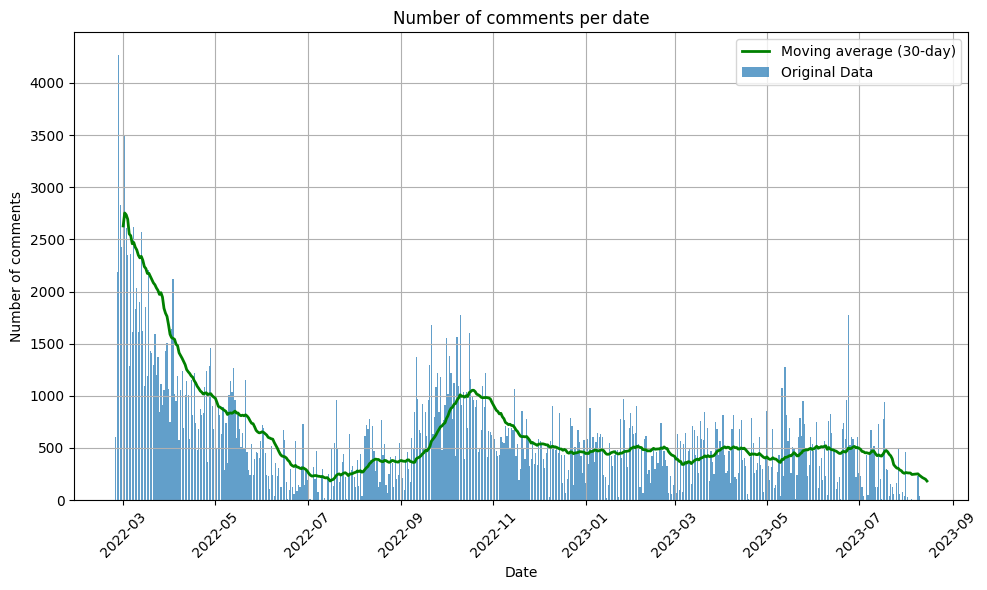

In [231]:
import matplotlib.pyplot as plt
import pandas as pd

date_count['date'] = pd.to_datetime(date_count['date'])

# Calculating the rolling mean
rolling_mean = date_count['count'].rolling(window=30, min_periods=6).mean()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(date_count['date'], date_count['count'], alpha=0.7, label='Original Data')
plt.plot(date_count['date'], rolling_mean, color='green', label=f'Moving average ({window_size}-day)', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Number of comments')
plt.title('Number of comments per date')

plt.xticks( rotation=45)
plt.legend()
plt.grid(True) 
plt.tight_layout()
plt.show()


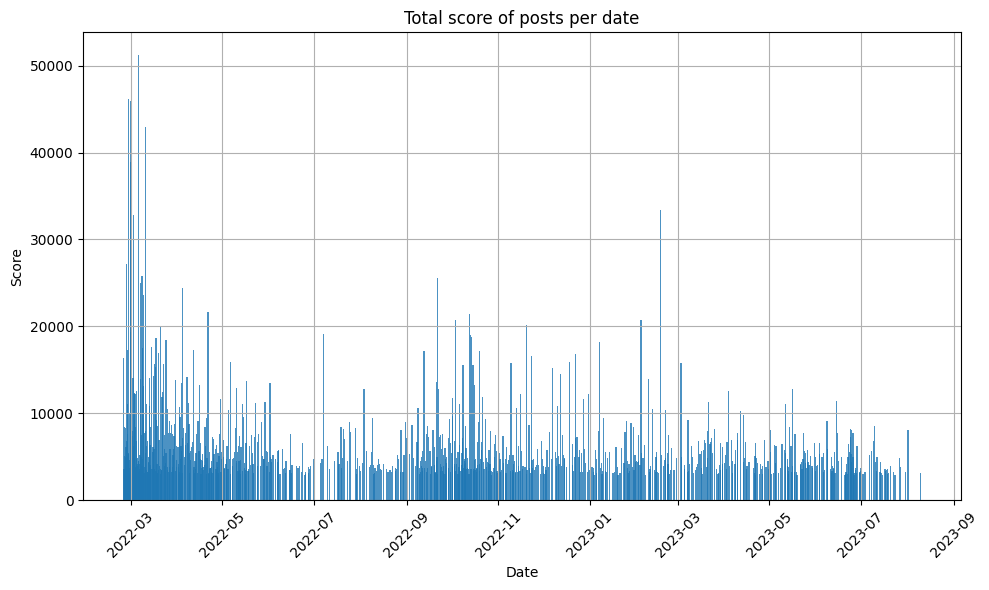

In [244]:
plt.figure(figsize=(10, 6))
plt.bar(created_utc_for_plotting, posts['score'], alpha=0.8)


plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Total score of posts per date')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
def extract_words(file_name):
    result = []  # storing words
    
    try:
        with open(file_name, 'r') as file:
            for line in file:
                words = line.strip().split()  # Splitting the line into words
                if words: 
                    word = words[0]
                    if words[1] == str(1):
                        result.append(word)
    except FileNotFoundError:
        print(f"File '{file_name}' not found.")
    
    return result

In [10]:
joy = extract_words('joy.txt')
positive = extract_words('positive.txt')
anticipation = extract_words('anticipation.txt')
fear = extract_words('fear.txt')

In [11]:
hope = [word for word in anticipation if word in positive+joy]

In [12]:
from textblob import TextBlob, Word

# Function to count lemmatized hope-related words in a text
def count_hope_words(text, emotion_dict):
    text = str(text)
    blob = TextBlob(text)
    lemmatized_words = [Word(word).lemmatize() for word in blob.words]
    hope_words = [word for word in lemmatized_words if word in emotion_dict]
    return len(hope_words)

In [13]:
# Applying the function to df to create a new column 'hope'
df['hope'] = df['body'].apply(count_hope_words, args=(hope,))

# Applying the function to df to create a new column 'fear'
df['fear'] = df['body'].apply(count_hope_words, args=(fear,))

In [25]:
print(len(df[(df['hope'] >0) & (df['fear'] >0)]))
print(len(df[df['hope'] >0]))
print(len(df[df['fear'] >0]))

51361
77674
138996


In [15]:
df['post_id'] = df['permalink'].str.split('/').apply(lambda x: x[4])

In [16]:
df.head(2)

,body,author,created_utc,score,parent_id,permalink,id,is_submitter,date,hope,fear,post_id
0,The Russians are trying to fight this like it'...,Daotar,1.646544e+09,1739,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjk4sk,False,2022-03-06,0,2,t7rf3v
1,fucking brilliant move........that is an excel...,iceman530,1.646543e+09,2040,t3_t7rf3v,/r/UkrainianConflict/comments/t7rf3v/ukrainian...,hzjhzye,False,2022-03-06,1,0,t7rf3v


In [17]:
df = df.merge(posts[['id', 'num_comments']], how='left', left_on='post_id', right_on='id')
df.drop('id_y', axis=1, inplace=True)
df.rename(columns={'id_x': 'id', 'num_comments': 'posts_comments'}, inplace=True)

In [18]:
df['relative_popularity'] = df['score'] / df['posts_comments']

In [19]:
subjectivity = df['body'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
df['subjectivity'] = subjectivity

In [53]:
df = df[df['subjectivity'] >=0.5]

In [59]:
df['adjusted_hope_score'] = df['hope'] / (len(df['body'])) * df['relative_popularity']
df['adjusted_fear_score'] = df['fear'] / (len(df['body'])) * df['relative_popularity']

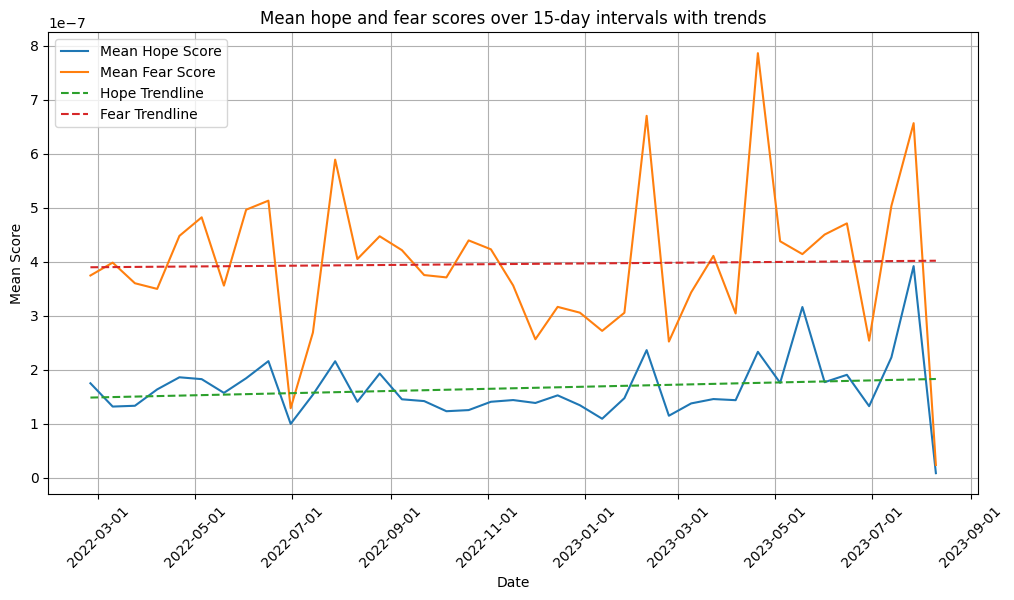

In [257]:
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Groupping
df_resampled = df.groupby(pd.Grouper(key='date', freq='14D')).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y=df_resampled['adjusted_hope_score'], label='Mean Hope Score')
sns.lineplot(data=df_resampled, x=df_resampled.index, y=df_resampled['adjusted_fear_score'], label='Mean Fear Score')

# Linear regression trendlines for hope and fear scores
X = np.arange(len(df_resampled)).reshape(-1, 1)
hope_trend = LinearRegression().fit(X, df_resampled['adjusted_hope_score'].values.reshape(-1, 1))
fear_trend = LinearRegression().fit(X, df_resampled['adjusted_fear_score'].values.reshape(-1, 1))

# Prediction hope and fear scores using the trendlines
hope_trendline = hope_trend.predict(X)
fear_trendline = fear_trend.predict(X)

# Trendlines to the plot
sns.lineplot(data=df_resampled, x=df_resampled.index, y=hope_trendline.flatten(), label='Hope Trendline', linestyle='--')
sns.lineplot(data=df_resampled, x=df_resampled.index, y=fear_trendline.flatten(), label='Fear Trendline', linestyle='--')

ax = plt.gca()
date_format = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_format)

plt.title('Mean hope and fear scores over 15-day intervals with trends')
plt.xlabel('Date')
plt.ylabel('Mean Score')
plt.xticks(rotation=45) 
plt.grid(True)

plt.legend()
plt.show()


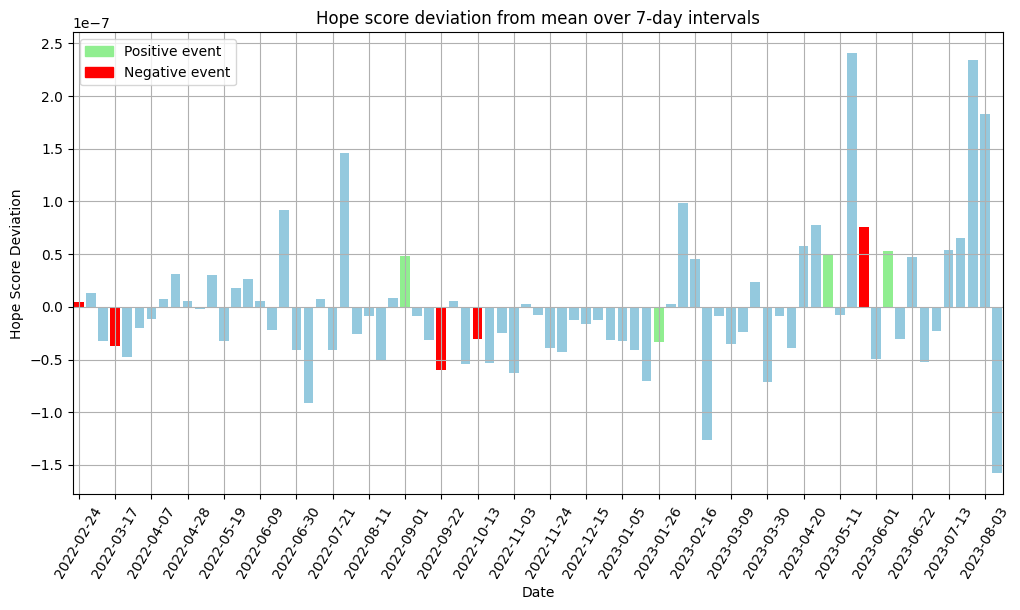

In [256]:
import matplotlib.patches as mpatches

df_resampled = df.groupby(pd.Grouper(key='date', freq='7D')).mean()

# Calculating the mean hope score
mean_hope_score = df_resampled['adjusted_hope_score'].mean()

df_resampled['hope_deviation'] = df_resampled['adjusted_hope_score'] - mean_hope_score

# Creating a bar plot to visualize the hope score deviations
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_resampled, x=df_resampled.index.strftime('%Y-%m-%d'), y=df_resampled['hope_deviation'], color='skyblue')

plt.title('Hope score deviation from mean over 7-day intervals')
plt.xlabel('Date')
plt.ylabel('Hope Score Deviation')
plt.xticks(range(0, len(df_resampled), 3), df_resampled.index[::3].strftime('%Y-%m-%d'), rotation=60)

positive_events = [27, 33, 48, 62, 67]
for idx in positive_events:
    ax.patches[idx].set_facecolor('lightgreen')

negative_events = [0, 3, 30, 33, 65]
for idx in negative_events:
    ax.patches[idx].set_facecolor('red')
    
plt.grid(True)

positive_patch = mpatches.Patch(color='lightgreen', label='Positive event')
negative_patch = mpatches.Patch(color='red', label='Negative event')

plt.legend(handles=[positive_patch, negative_patch])

    
plt.show()

In [110]:
from yahoo_fin import stock_info

# Historical stock data
usdrub = stock_info.get_data('USDRUB=X', start_date='2022-02-24', end_date='2023-08-04')
ukoil = stock_info.get_data('UKOG.L', start_date='2022-02-24', end_date='2023-08-04')
crude_oil = stock_info.get_data('CL=F', start_date='2022-02-24', end_date='2023-08-04')
gas = stock_info.get_data('NG=F', start_date='2022-02-24', end_date='2023-08-04')

In [112]:
stock = df_resampled[['adjusted_hope_score', 'adjusted_fear_score']]
stock = stock.merge(usdrub['close'], left_index=True, right_index=True, how='inner')
stock.rename(columns={"close": "usdrub"}, inplace=True)
stock = stock.merge(ukoil['close'], left_index=True, right_index=True, how='inner')
stock.rename(columns={"close": "ukoil"}, inplace=True)
stock = stock.merge(crude_oil['close'], left_index=True, right_index=True, how='inner')
stock.rename(columns={"close": "crude_oil"}, inplace=True)
stock = stock.merge(gas['close'], left_index=True, right_index=True, how='inner')
stock.rename(columns={"close": "gas"}, inplace=True)
stock

,adjusted_hope_score,adjusted_fear_score,usdrub,ukoil,crude_oil,gas
2022-02-24,1.710657e-07,3.531495e-07,81.414398,0.108,92.809998,4.568
2022-03-03,1.801567e-07,4.017773e-07,102.714996,0.110,107.669998,4.722
2022-03-10,1.339007e-07,4.196586e-07,138.714996,0.133,106.019997,4.631
2022-03-17,1.296278e-07,3.733960e-07,100.965103,0.118,102.980003,4.990
2022-03-24,1.193498e-07,3.531387e-07,96.714996,0.131,112.339996,5.401
...,...,...,...,...,...,...
2023-07-06,1.435272e-07,2.216941e-07,91.214996,0.058,71.800003,2.609
2023-07-13,2.205264e-07,4.253604e-07,90.095001,0.057,76.889999,2.545
2023-07-20,2.323901e-07,8.068599e-07,90.065002,0.059,75.629997,2.757
2023-07-27,4.010309e-07,4.602086e-07,90.665001,0.054,80.089996,2.492


In [196]:
# there exists one nan, replacing with the average of the two closest dates
stock['ukoil'].iloc[33] = (stock['ukoil'].iloc[32] + stock['ukoil'].iloc[34])/ 2

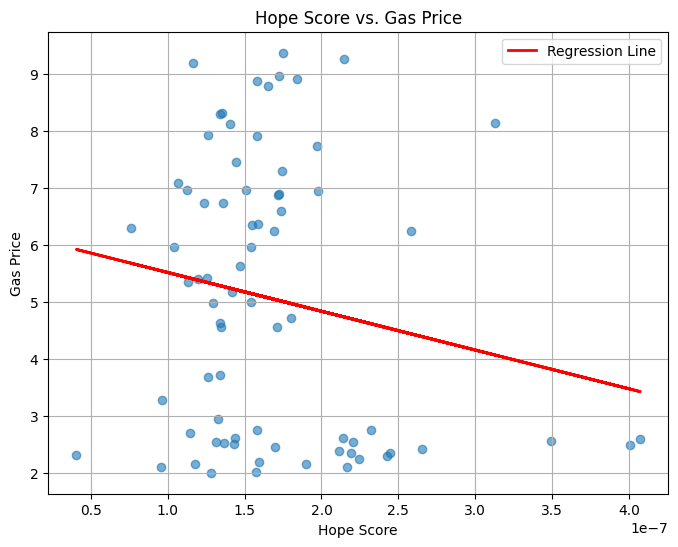

R-squared: 0.03


In [266]:
hope_scores = stock['adjusted_hope_score']
gas_prices = stock['gas']

# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(hope_scores, gas_prices, alpha=0.6)
plt.title('Hope Score vs. Gas Price')
plt.xlabel('Hope Score')
plt.ylabel('Gas Price')
plt.grid(True)

# Performing linear regression
model = LinearRegression()
model.fit(hope_scores.values.reshape(-1, 1), gas_prices)

# Model parameters
slope = model.coef_[0]
intercept = model.intercept_

# Regression line
plt.plot(hope_scores, model.predict(hope_scores.values.reshape(-1, 1)), color='red', linewidth=2, label=f'Regression Line')

plt.legend()
plt.show()


r_squared = model.score(hope_scores.values.reshape(-1, 1), gas_prices)
print(f'R-squared: {r_squared:.2f}')

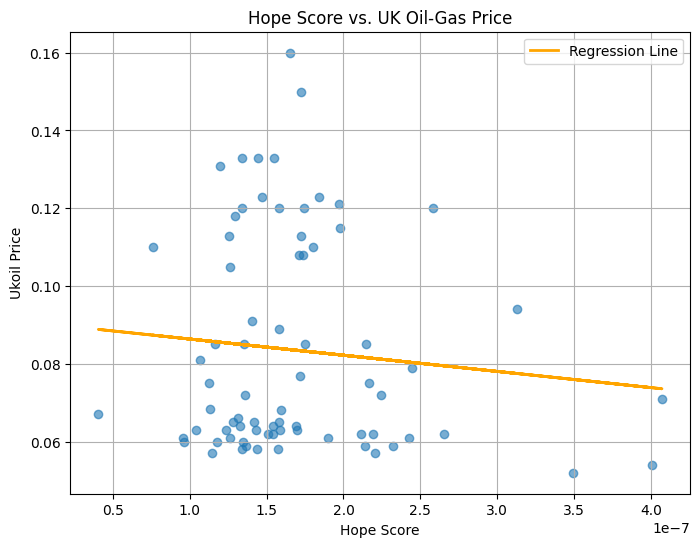

R-squared: 0.01


In [249]:
hope_scores = stock['adjusted_hope_score']
ukoil_prices = stock['ukoil']


plt.figure(figsize=(8, 6))
plt.scatter(hope_scores, ukoil_prices, alpha=0.6)
plt.title('Hope Score vs. UK Oil-Gas Price')
plt.xlabel('Hope Score')
plt.ylabel('Ukoil Price')
plt.grid(True)

model = LinearRegression()
model.fit(hope_scores.values.reshape(-1, 1), ukoil_prices)

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(hope_scores, model.predict(hope_scores.values.reshape(-1, 1)), color='orange', linewidth=2, label=f'Regression Line')

plt.legend()
plt.show()

r_squared = model.score(hope_scores.values.reshape(-1, 1), ukoil_prices)
print(f'R-squared: {r_squared:.2f}')

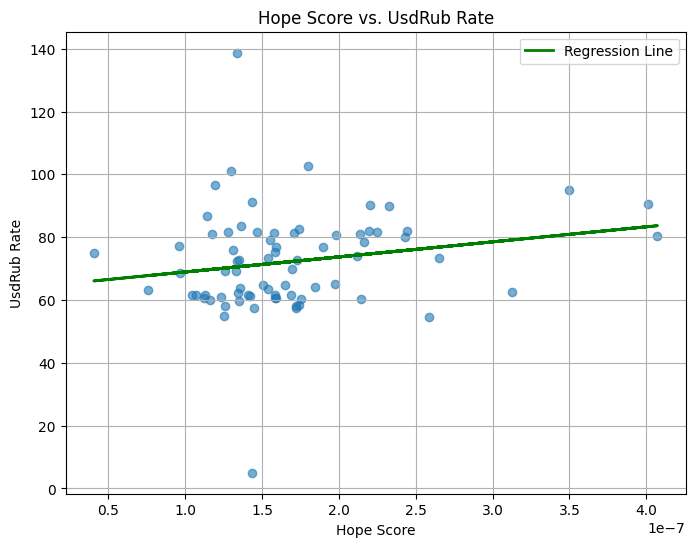

R-squared: 0.04


In [259]:
hope_scores = stock['adjusted_hope_score']
usdrub_rates = stock['usdrub']


plt.figure(figsize=(8, 6))
plt.scatter(hope_scores, usdrub_rates, alpha=0.6)
plt.title('Hope Score vs. UsdRub Rate')
plt.xlabel('Hope Score')
plt.ylabel('UsdRub Rate')
plt.grid(True)

model = LinearRegression()
model.fit(hope_scores.values.reshape(-1, 1), usdrub_rates)

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(hope_scores, model.predict(hope_scores.values.reshape(-1, 1)), color='green', linewidth=2, label=f'Regression Line')

plt.legend()
plt.show()

r_squared = model.score(hope_scores.values.reshape(-1, 1), usdrub_rates)
print(f'R-squared: {r_squared:.2f}')

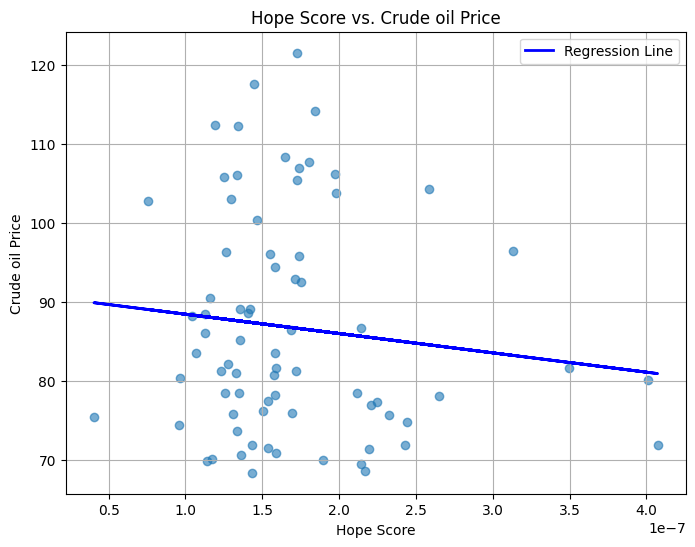

R-squared: 0.01


In [260]:
hope_scores = stock['adjusted_hope_score']
crude_oil_prices = stock['crude_oil']


plt.figure(figsize=(8, 6))
plt.scatter(hope_scores, crude_oil_prices, alpha=0.6)
plt.title('Hope Score vs. Crude oil Price')
plt.xlabel('Hope Score')
plt.ylabel('Crude oil Price')
plt.grid(True)

model = LinearRegression()
model.fit(hope_scores.values.reshape(-1, 1), crude_oil_prices)

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(hope_scores, model.predict(hope_scores.values.reshape(-1, 1)), color='blue', linewidth=2, label=f'Regression Line')

plt.legend()
plt.show()

r_squared = model.score(hope_scores.values.reshape(-1, 1), crude_oil_prices)
print(f'R-squared: {r_squared:.2f}')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


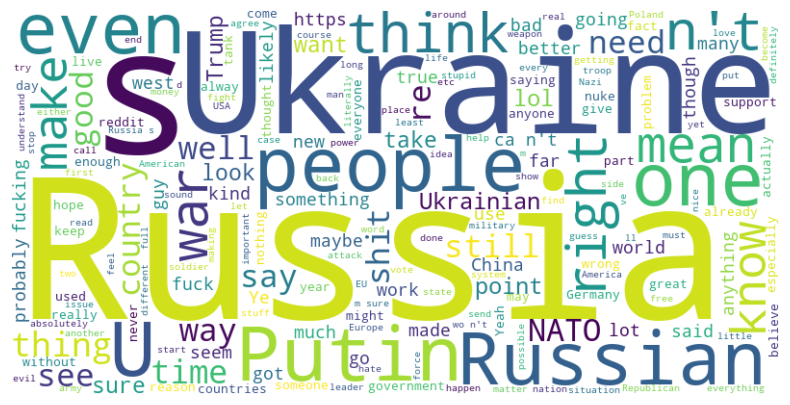

In [161]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


text_column = df['body']

# Concatenating all text data into a single string
text = ' '.join(text_column)

# Tokenizing the text and remove stopwords
words = nltk.word_tokenize(text)
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.lower() not in stop_words]

text = ' '.join(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [192]:
# for fear

# df_resampled = df.groupby(pd.Grouper(key='date', freq='7D')).mean()

# # Calculate the mean hope score
# mean_fear_score = df_resampled['adjusted_fear_score'].mean()

# # Calculate the hope score deviation from the mean
# df_resampled['fear_deviation'] = df_resampled['adjusted_fear_score'] - mean_fear_score

# # Create a bar plot to visualize the hope score deviations
# plt.figure(figsize=(12, 6))
# ax = sns.barplot(data=df_resampled, x=df_resampled.index.strftime('%Y-%m-%d'), y=df_resampled['fear_deviation'], color='skyblue')

# plt.title('Fear Score Deviation from Mean Over 7-Day Intervals')
# plt.xlabel('Date')
# plt.ylabel('Fear Score Deviation')
# plt.xticks(rotation=60)
# plt.show()

In [263]:
# # a 2x2 grid of subplots
# fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# # FIRST subplot
# hope_scores = stock['adjusted_hope_score']
# gas_prices = stock['gas']

# axs[0, 0].scatter(hope_scores, gas_prices, alpha=0.6)
# axs[0, 0].set_title('Hope Score vs. Gas Price')
# axs[0, 0].set_xlabel('Hope Score')
# axs[0, 0].set_ylabel('Gas Price')
# axs[0, 0].grid(True)

# model = LinearRegression()
# model.fit(hope_scores.values.reshape(-1, 1), gas_prices)

# axs[0, 0].plot(hope_scores, model.predict(hope_scores.values.reshape(-1, 1)), color='red', linewidth=2, label=f'Regression Line')
# axs[0, 0].legend()

# # SECOND subplot
# hope_scores = stock['adjusted_hope_score']
# ukoil_prices = stock['ukoil']

# axs[0, 1].scatter(hope_scores, ukoil_prices, alpha=0.6)
# axs[0, 1].set_title('Hope Score vs. UK Oil-Gas Price')
# axs[0, 1].set_xlabel('Hope Score')
# axs[0, 1].set_ylabel('Ukoil Price')
# axs[0, 1].grid(True)

# model = LinearRegression()
# model.fit(hope_scores.values.reshape(-1, 1), ukoil_prices)

# axs[0, 1].plot(hope_scores, model.predict(hope_scores.values.reshape(-1, 1)), color='orange', linewidth=2, label=f'Regression Line')
# axs[0, 1].legend()

# # THIRD subplot
# hope_scores = stock['adjusted_hope_score']
# usdrub_rates = stock['usdrub']

# axs[1, 0].scatter(hope_scores, usdrub_rates, alpha=0.6)
# axs[1, 0].set_title('Hope Score vs. UsdRub Rate')
# axs[1, 0].set_xlabel('Hope Score')
# axs[1, 0].set_ylabel('UsdRub Rate')
# axs[1, 0].grid(True)

# model = LinearRegression()
# model.fit(hope_scores.values.reshape(-1, 1), usdrub_rates)

# axs[1, 0].plot(hope_scores, model.predict(hope_scores.values.reshape(-1, 1)), color='green', linewidth=2, label=f'Regression Line')
# axs[1, 0].legend()

# # FOURTH subplot
# hope_scores = stock['adjusted_hope_score']
# crude_oil_prices = stock['crude_oil']

# axs[1, 1].scatter(hope_scores, crude_oil_prices, alpha=0.6)
# axs[1, 1].set_title('Hope Score vs. Crude oil Price')
# axs[1, 1].set_xlabel('Hope Score')
# axs[1, 1].set_ylabel('Crude oil Price')
# axs[1, 1].grid(True)

# model = LinearRegression()
# model.fit(hope_scores.values.reshape(-1, 1), crude_oil_prices)

# axs[1, 1].plot(hope_scores, model.predict(hope_scores.values.reshape(-1, 1)), color='blue', linewidth=2, label=f'Regression Line')
# axs[1, 1].legend()

# plt.tight_layout()

# plt.show()
